In [65]:
%matplotlib inline  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as cpl
import matplotlib.cm as cmx
from matplotlib.collections import LineCollection
import numpy as np

import preprocess_package



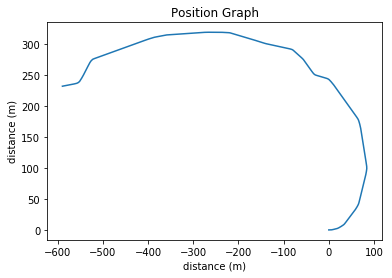

In [66]:
DATA_FILE = 'data/driving_log.csv'

data = preprocess_package.process_position(preprocess_package.preprocess(DATA_FILE))
aggressiveness = preprocess_package.aggFuzzyLogic()
data['aggressiveness'] = data.apply(lambda row: aggressiveness.compute(row['velocity'], row['throttle']), axis=1)

# Plot path (x,y)
plt.figure()
plt.title('Position Graph')
plt.ylabel('distance (m)')
plt.xlabel('distance (m)')
plt.plot(data.abs_x, data.abs_y)

Text(0.5,0,'time (s)')

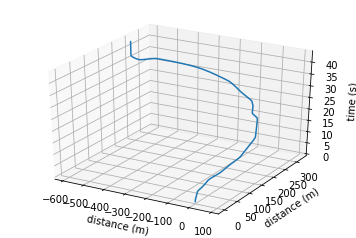

In [67]:
# Position vs. Time graph

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(xs=data.abs_x, ys=data.abs_y, zs=data.time)
ax.set_xlabel('distance (m)')
ax.set_ylabel('distance (m)')
ax.set_zlabel('time (s)')

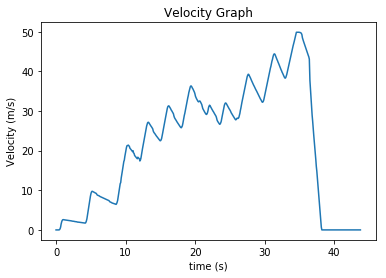

In [68]:
plt.figure()
plt.title('Velocity Graph')
plt.ylabel('Velocity (m/s)')
plt.xlabel('time (s)')
plt.plot(data.time, data.velocity)

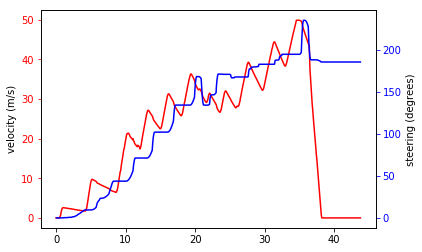

In [69]:
# Subplots with velocity & steering vs time
fig, ax = plt.subplots()

axes = [ax, ax.twinx()]
dp = [data.time, data.time]
dp2 = [data.velocity, data.abs_steering]
y_axis = ["velocity (m/s)", "steering (degrees)"]

colors = ('Red', 'Blue')
for ax, color, d, d2, y in zip(axes, colors, dp, dp2, y_axis):
    ax.plot(d, d2, color=color)
    ax.set_ylabel(y)
    ax.tick_params(axis='y', colors=color)
plt.show()

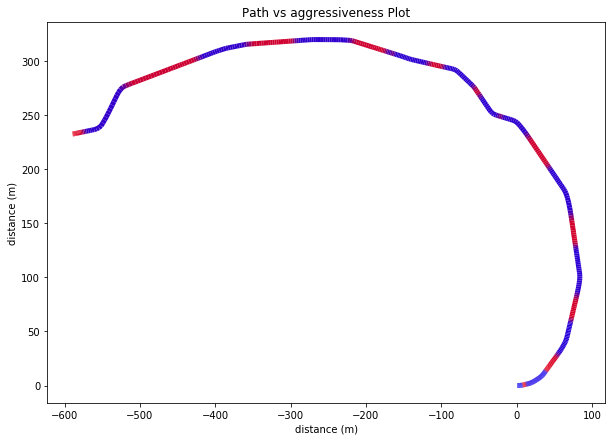

In [56]:
# Position Graph with custom colormap for aggressiveness (fuzzy logic of velocity & throttle)

# cm = plt.get_cmap('cool') 
cdict = {'red':   [(0.0,  0.0, 0.0),
#                    (0.5,  0.0, 0.0),
                   (1.0,  1.0, 1.0)],

         'green': [(0.0,  0.0, 0.0),
#                    (0.25, 0.0, 0.0),
#                    (0.75, 1.0, 1.0),
                   (1.0,  0.0, 0.0)],

         'blue':  [(0.0,  1.0, 1.0),
#                    (0.5,  1.0, 1.0),
#                    (0.75,  0.0, 0.0),
                   (1.0,  0.0, 0.0)]}

# cm = cpl.LinearSegmentedColormap.from_list("", ["blue","violet","red"])
cm = cpl.LinearSegmentedColormap("", cdict)
cNorm  = cpl.Normalize(vmin=-3.4, vmax=3.4)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)

xy = [[xx, yy] for (xx,yy) in zip(data.abs_x, data.abs_y)]#(data.abs_x, data.abs_y)

xy = [ [x0, x1] for x0, x1 in zip(xy[:-1], xy[1:])]

cSegments = [scalarMap.to_rgba(c) for c in data.aggressiveness]
fig, ax = plt.subplots()
coll = LineCollection(xy, linewidth=5, linestyles='solid', color=cSegments)
# fig = plt.gcf()
ax.add_collection(coll)
ax.autoscale_view()
ax.set_title('Path vs aggressiveness Plot')
ax.set_ylabel("distance (m)")
ax.set_xlabel("distance (m)")
fig.set_size_inches(10,7)
fig.savefig("cap.png", dpi=1000)


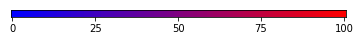

In [61]:
m = np.zeros((1,101))

for i in range(101):
    m[0,i] = (i)/100.0

plt.imshow(m, cmap=cm, aspect=2)
plt.yticks(np.arange(0))
plt.xticks(np.arange(0,101,25), [0,25,50,75,100])
plt.show()

In [10]:
data

,date,steering,throttle,brake,velocity,rpm,torque,time,time_diff,distance,rel_steering,abs_steering,rel_x,rel_y,abs_x,abs_y,agg
0,1510954602394,0.000000,0.000000,0.000000,4.484198e-06,2.114985e-07,2000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.333333
1,1510954602464,0.000000,0.000000,0.000000,1.634813e-06,2.063326e-07,2000,0.070,0.070,1.144369e-07,-0.000000,0.000000,1.144369e-07,0.000000,1.144369e-07,0.000000,-3.333333
2,1510954602532,0.000000,0.000000,0.000000,5.167260e-06,1.862830e-07,2000,0.138,0.068,3.513737e-07,-0.000000,0.000000,3.513737e-07,0.000000,4.658106e-07,0.000000,-3.333333
3,1510954602614,0.000000,0.000000,0.000000,1.895535e-06,1.711031e-07,2000,0.220,0.082,1.554339e-07,-0.000000,0.000000,1.554339e-07,0.000000,6.212445e-07,0.000000,-3.333333
4,1510954602684,0.000000,0.000000,0.000000,9.427592e-07,1.517557e-07,2000,0.290,0.070,6.599314e-08,-0.000000,0.000000,6.599314e-08,0.000000,6.872376e-07,0.000000,-3.333333
5,1510954602765,0.000000,0.000000,0.000000,1.177194e-06,1.256012e-07,2000,0.371,0.081,9.535271e-08,-0.000000,0.000000,9.535271e-08,0.000000,7.825903e-07,0.000000,-3.333333
6,1510954602839,0.000000,0.000000,0.000000,2.235243e-07,9.704677e-08,2000,0.445,0.074,1.654080e-08,-0.000000,0.000000,1.654080e-08,0.000000,7.991311e-07,0.000000,-3.333333
7,1510954602919,0.000000,0.214662,0.000000,1.221688e-01,1.516433e-03,1920,0.525,0.080,9.773504e-03,-0.000000,0.000000,9.773504e-03,0.000000,9.774303e-03,0.000000,-1.224706
8,1510954602985,0.000000,0.387723,0.000000,3.402332e-01,4.583971e-03,1960,0.591,0.066,2.245539e-02,-0.000000,0.000000,2.245539e-02,0.000000,3.222969e-02,0.000000,-0.541905
9,1510954603052,0.000000,0.589509,0.000000,7.244688e-01,1.142287e-02,1900,0.658,0.067,4.853941e-02,-0.000000,0.000000,4.853941e-02,0.000000,8.076910e-02,0.000000,0.450652
